**Before you turn this problem in, make sure your notebook is in tidy format and everything runs as expected:**

1. When the problem needs you to write codes inside a function, just directly write codes inside the already-existing functions. Don't create new functions and write your code in the new functions. 

2. Don't modify the original TEST cells! You can insert new testing cells to test your code when doing your homework. But make sure to delete those **new testing cells** after you finish your problem.

3. After you complete all problems, to insure there is no error in your notebook, do the following: first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and second **run all cells** (in the menubar, select Cell$\rightarrow$Run All). **Note that this step is very important and can help you catch the error!**

**Make sure you delete `raise NotImplementedError()`** (if existing) inside the function before you write your code and fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE":

In [1]:
# fill in your name
NAME = "Dylan Elliott"

---

# matplotlib

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

For all plots, make sure that you use labels with units as appropriate, and make good choices about all of the plot characteristics like fontsize, colors, and markersize. I'll be grading your plots with clarity and design in mind.

There are no functions set up for you in this assignment. You can write functions to use in your code if you want, or not — it is up to you. I'll be manually grading these questions by inspection, so there are no tests for you to run.

### 1. Plot a sin wave

Plot the function sin($2 \pi x$) from x = 0 to 20. Label the graph, where the x-axis is time, and the y-axis is amplitude. **Make sure you use enough points in $x$ that the function is resolved or fully visible**.

---

Grading rubric [4 points]:

* [2 pts] Plotted data is correct over the right range
* [2 pts] Asthetics: Colors, resolution of line, labels, etc.


(-1.5, 1.5)

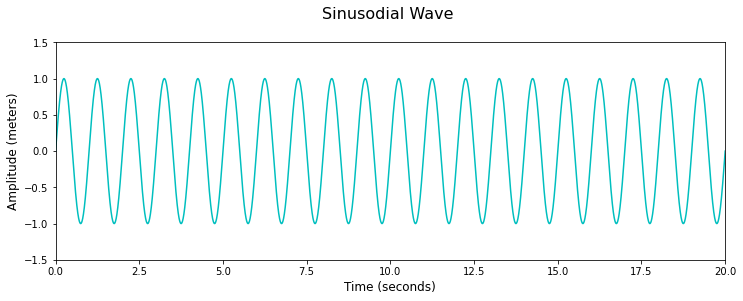

In [14]:
# YOUR CODE HERE

x = np.linspace(0,20,10000)
y = np.sin(2*np.pi*x)
# sin_wave = plt.figure(figsize=(12,12))
# ax = sin_wave.add_subplot()
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(x,y,color='c')
ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Amplitude (meters)', fontsize=12)
ax.set_title('Sinusodial Wave \n',fontsize=16)
# ax.set_aspect(1)
ax.set_xlim(0,20)
ax.set_ylim(-1.5, 1.5)

### 2. Plot a function and the mean

Plot the fourth power of the same function as in problem 1, [sin($2 \pi x$)]$^4$, over the same range, x = 0 to 20. Plot the mean of this new function over the range using a distinct line style (a horizontal line). Lable the axes and lines.

---

Grading rubric [4 points]:

* [2 pts] Plotted data is correct
* [2 pts] Asthetics: readability, colors, labels, etc.

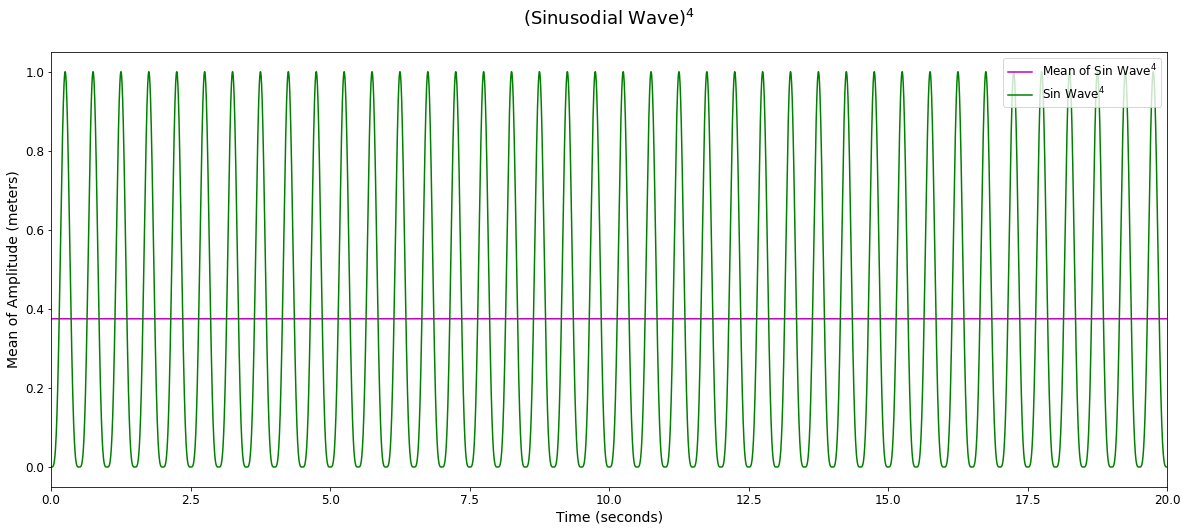

In [38]:
# YOUR CODE HERE
x = np.linspace(0,20,10000)
y = (np.sin(2*(np.pi)*x))**4
y_mean = np.mean(y) * np.ones_like(x) # fit the shape

sin_wave = plt.figure(figsize=(20,8))
ax = sin_wave.add_subplot()

ax.plot(x,y_mean,color='m', linestyle='solid',label='Mean of Sin Wave$^4$')
ax.plot(x,y,color='green',label='Sin Wave$^4$',linestyle='solid')
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Mean of Amplitude (meters)', fontsize=14)
ax.set_title('(Sinusodial Wave)$^4$ \n',fontsize=18)
# ax.set_aspect(1)
ax.set_xlim(0,20)
ax.set_ylim(-.05, 1.05)
ax.legend(loc='upper right',fontsize=12)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

### 3. Fit a line and plot

Load in the long-term Mauna Loa carbon dioxide dataset:

    mauna_loa_co2 = np.genfromtxt('co2_mm_mlo.txt')

to access the CO$_2$ data. Open this txt file to see the columns. Make two figures based on this data:

##### Figure 1
Fit a 1st (straight line), 3rd, and 5th order polynomial to the data (date will be your x value and CO2 value will be your y value). 

* Use the "de-seasonalized" column as the CO2 value, not the “monthly average". 

* Use the “decimal date” column as the date, not the single year.

then plot the polynomial fits along with the original CO2 data to compare. The fits should be shown only in the range of the data. Note that you should put all three fitted lines in the same figure. 

Hints: using np.polyfit() and np.polyval() you learned before in the numpy class to do the fitting.

###### Figure 2
Also, use your polynomial fits to predict CO$_2$ in the year 2150. Show your predictions by making another plot and showing the three polynomials extended out to 2150 (**not only the 2150 single point!**). Then **print** the function values for each of the three polynomials at 2150. Note that you should still put all three fitted lines in the same figure.

###### Interpretation
Which polynomial fit do you think is best and why?

---

Grading rubric [8 points]:

* [3 pts] Plotted data and polynomial fits that are labeled, clear, and look nice. The polynomial fits should look reasonable for the data.
* [3 pts] Get proper values for the prediction at 2150 and show extension into future graphically in plot.
* [2 pts] Interpretation explanation.

### Write your code below



First order prediction of CO2 in 2150 = 614.628218748825 ppm.

Third order prediction of CO2 in 2150 = 1071.8819472157338 ppm.

Fifth order prediction of CO2 in 2150 = -8914.743263244629 ppm.



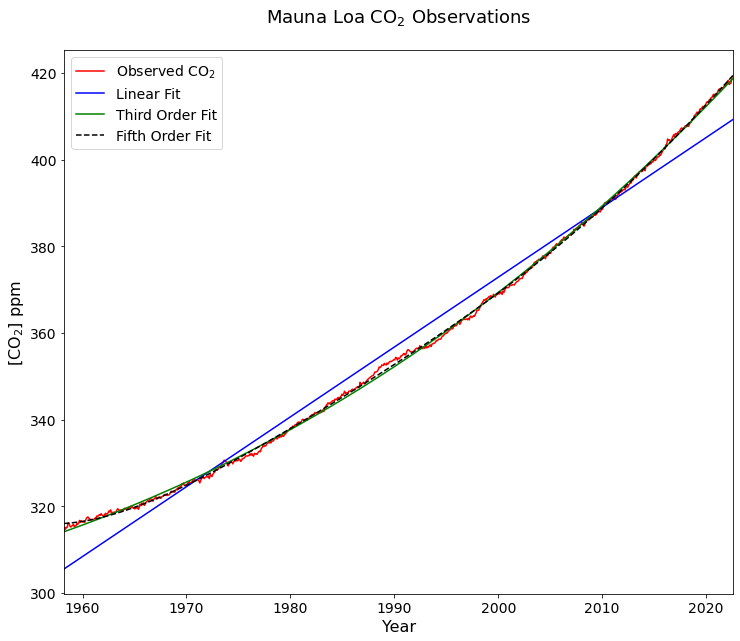

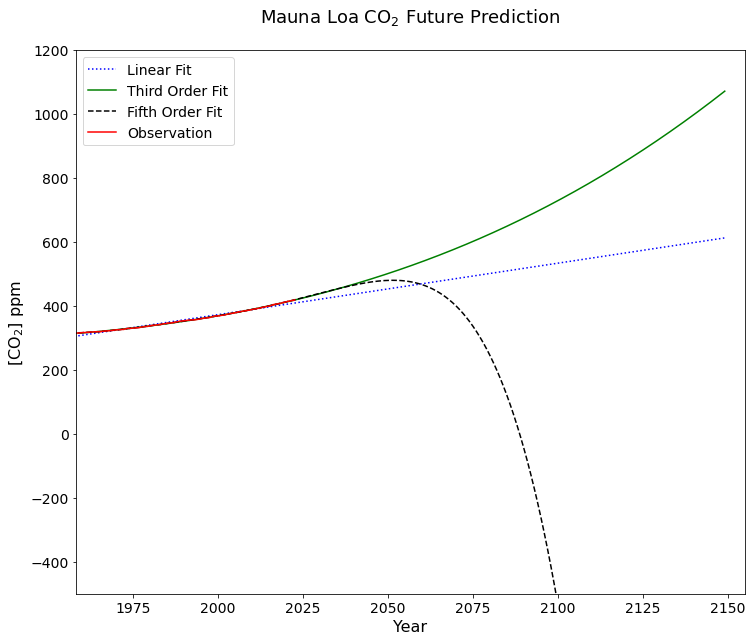

In [40]:
# load data
mauna_loa_co2 = np.genfromtxt('co2_mm_mlo.txt')

# load variables
x = mauna_loa_co2[:,2] # decimal date column

y = mauna_loa_co2[:,4] # deseasonalized co2 column

'''
Figure 1
'''

# poly fits 
poly1 = np.polyfit(x,y,1)
poly3 = np.polyfit(x,y,3)
poly5 = np.polyfit(x,y,5)

# fitting slopes to years
# y_fit = mx + b 
y_fit1 = (poly1[0] * x) + poly1[1]

# make poly3 and poly5 into np.poly1d objects 
# then call on years (x) in the plot function
poly3_object = np.poly1d(poly3)
poly5_object = np.poly1d(poly5)
poly3_val = np.polyval(poly3, x)
poly5_val = np.polyval(poly5, x)

# plotting figure 1 = data + fits

fig1, ax1 = plt.subplots(figsize=(12,10))

ax1.plot(x,y,color='red', label='Observed CO$_2$')
ax1.plot(x,y_fit1,color='blue', label='Linear Fit')
ax1.plot(x, poly3_val,color='green',label='Third Order Fit')
ax1.plot(x, poly5_val, color='black',linestyle='dashed',label='Fifth Order Fit')


# details
ax1.set_title('Mauna Loa CO$_2$ Observations\n',fontsize=18)
ax1.set_ylabel('[CO$_2$] ppm',fontsize=16)
ax1.set_xlabel('Year',fontsize=16)
ax1.legend(loc='upper left',fontsize=14)
ax1.set_xlim(x[0],x[-1])
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)


'''
FIGURE 2 
'''

#extrapolate to 2150 = use years instead of x

years = np.arange(1959,2150,1)
# poly fits 
poly1_2 = np.polyfit(x,y,1)
poly3_2 = np.polyfit(x,y,3)
poly5_2 = np.polyfit(x,y,5)

poly3_val_2 = np.polyval(poly3_2,years)
poly5_val_2 = np.polyval(poly5_2,years)
# fitting slopes to years
# y_fit = mx + b 
y_fit1_2 = (poly1[0] * years) + poly1[1]

# use above poly objects but call on years instead of x.

fig2, ax2 = plt.subplots(figsize=(12,10))

ax2.plot(years, y_fit1_2,color='blue',linestyle='dotted', label='Linear Fit')
ax2.plot(years, poly3_val_2,color='green',label='Third Order Fit')
ax2.plot(years, poly5_val_2, color='black',linestyle='dashed',label='Fifth Order Fit')
# ax2.plot(years, poly3_object(years),color='green',label='Third Order Fit')
# ax2.plot(years, poly5_object(years), color='black',linestyle='dashed',label='Fifth Order Fit')
ax2.plot(x,y,color='red',label='Observation')
# details
ax2.set_title('Mauna Loa CO$_2$ Future Prediction\n',fontsize=18)
ax2.set_ylabel('[CO$_2$] ppm',fontsize=16)
ax2.set_xlabel('Year',fontsize=16)
# ax2.set_yscale('log')
ax2.set_ylim(-500, 1200)
ax2.legend(loc='upper left',fontsize=14)
ax2.set_xlim(x[0],2155)
ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)

# print CO2 values from year 2150 from each of the polyfits

linearfit2150 = (poly1[0] * 2150) + poly1[1]

print('\n\nFirst order prediction of CO2 in 2150 = ' + str(linearfit2150) + ' ppm.\n')

# print('Third order prediction of CO$_2$ in 2150 = ' + str(poly3_object(2150)) + ' ppm.\n')

#using Polyval
print('Third order prediction of CO2 in 2150 = ' + str(poly3_val_2[-1]) + ' ppm.\n')

# print('Fifth order prediction of CO$_2$ in 2150 = ' + str(poly5_object(2150)) + ' ppm.\n')
print('Fifth order prediction of CO2 in 2150 = ' + str(poly5_val_2[-1]) + ' ppm.\n')

### Write your Interpretation below

I think the Polyfit3 line best predicts the CO2 concentration in 2150 because it best captures the trajectory  of an exponential increase in CO2 from 1959 to 2022 into the future. The Linear line clearly does not capture the exponential behavior and underestimates CO$_2$ ppm in 2150. Lastly, my Fifth Order line has the worst prediction after ~year 2030, this is due to the fifth order fit creating oscillations and complex behavior. 